<a href="https://colab.research.google.com/github/mrrajatgarg/kaggle/blob/master/dogsvscatsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading of dataset from Kaggle

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mrrajatgarg","key":"ae5a419aa72b781b3ca5459616930b23"}'}

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Feb  5 18:07 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 41.0MB/s]
 96% 260M/271M [00:01<00:00, 188MB/s]
100% 271M/271M [00:01<00:00, 161MB/s]
 96% 524M/543M [00:03<00:00, 192MB/s]
100% 543M/543M [00:04<00:00, 142MB/s]


In [0]:
!ls

In [0]:
from zipfile import ZipFile

file_name = "train.zip"

# opening the zip file in read me mode
with ZipFile(file_name, 'r') as zip :
  print("Extracting the files...")
  zip.extractall()
  print("Done")

Extracting the files...
Done


In [0]:
file_name = "test1.zip"

# opening the zip file in read me mode
with ZipFile(file_name, 'r') as zip :
  print("Extracting the files...")
  zip.extractall()
  print("Done")

Extracting the files...
Done


In [0]:
!ls

# Importing Libraries

In [0]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!pip install np_utils

In [0]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [0]:
from sklearn.utils import shuffle

In [0]:
!pip install sklearn
import sklearn
from sklearn.model_selection import train_test_split

# Converting image's to vectors

In [0]:
TRAIN_DIR = './train/'
TEST_DIR = './test1/'

In [0]:
ROWS = 64
COLS = 64
CHANNELS = 3

In [0]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [0]:
def read_image(file_path):
  #print(file_path)
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  #print(img)
  return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

In [0]:
def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((m,ROWS,COLS,CHANNELS), dtype=np.uint8)
  y = np.zeros((m,1))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[i,:] = np.squeeze(image.reshape((ROWS, COLS, CHANNELS)))
    if 'dog' in image_file.lower() :
      y[i,0] = 1
    elif 'cat' in image_file.lower() :
      y[i,0] = 0
    else : # for test data
      y[i,0] = image_file.split('/')[-1].split('.')[0]
      
    if i%1000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

In [0]:
X, y = prep_data(train_images)

X.shape is (25000, 64, 64, 3)
Proceed 0 of 25000
Proceed 1000 of 25000
Proceed 2000 of 25000
Proceed 3000 of 25000
Proceed 4000 of 25000
Proceed 5000 of 25000
Proceed 6000 of 25000
Proceed 7000 of 25000
Proceed 8000 of 25000
Proceed 9000 of 25000
Proceed 10000 of 25000
Proceed 11000 of 25000
Proceed 12000 of 25000
Proceed 13000 of 25000
Proceed 14000 of 25000
Proceed 15000 of 25000
Proceed 16000 of 25000
Proceed 17000 of 25000
Proceed 18000 of 25000
Proceed 19000 of 25000
Proceed 20000 of 25000
Proceed 21000 of 25000
Proceed 22000 of 25000
Proceed 23000 of 25000
Proceed 24000 of 25000


In [0]:
X, y = shuffle(X, y)

In [0]:
X.shape

(25000, 64, 64, 3)

In [0]:
y.shape

(25000, 1)

# Splitting of dataset into train (60%), validation (20%) and test (20%)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1) #20000

In [0]:
X_train.shape

(20000, 64, 64, 3)

In [0]:
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [0]:
X_train[0]

In [0]:
X_train.shape

(20000, 64, 64, 3)

In [0]:
#X_test.shape

In [0]:
X_val.shape

(5000, 64, 64, 3)

# Converting to one-hot vector representation

In [0]:
y_train_one_hot = to_categorical(y_train)

In [0]:
y_train_one_hot.shape

(20000, 2)

In [0]:
num_classes = y_train_one_hot.shape[1]
print(num_classes)

2


In [0]:
y_val_one_hot = to_categorical(y_val)

In [0]:
y_val_one_hot.shape

(5000, 2)

In [0]:
#y_test_one_hot = to_categorical(y_test)

In [0]:
#y_test_one_hot.shape

# Visualizing the dataset

In [0]:
classes = {0: 'cats',
          1: 'dogs'}

In [0]:
def show_images(X, y, idx) :
  image = X[idx]
  #image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx,0]]))
  plt.show()

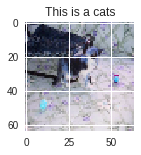

In [0]:
show_images(X_train, y_train, 0)

In [0]:
X_train_norm = X_train / 255
X_val_norm = X_val / 255
#X_test_norm = X_test / 255

In [0]:
X_train_norm[0]

In [0]:
X_train_norm.shape

(20000, 64, 64, 3)

In [0]:
X_val_norm[0]

In [0]:
X_val_norm.shape

(5000, 64, 64, 3)

In [0]:
#X_test_norm[0]

In [0]:
#X_test_norm.shape

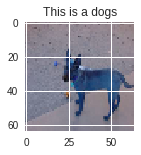

In [0]:
show_images(X_train_norm, y_train, 5)

# Model Architecture and Training of Model

In [0]:
model1 = Sequential()

model1.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Conv2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.6))

model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Flatten())
model1.add(Dropout(0.6))

model1.add(Dense(units=120, activation='relu'))
model1.add(Dense(units=2, activation='sigmoid'))

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 6, 6, 64)          0         
__________

In [0]:
model1.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=20, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 8s 385us/step - loss: 0.6659 - acc: 0.5793 - val_loss: 0.6241 - val_acc: 0.6558
Epoch 2/20
20000/20000 [==============================] - 7s 333us/step - loss: 0.5993 - acc: 0.6787 - val_loss: 0.5478 - val_acc: 0.7296
Epoch 3/20
20000/20000 [==============================] - 7s 334us/step - loss: 0.5474 - acc: 0.7221 - val_loss: 0.5477 - val_acc: 0.7112
Epoch 4/20
20000/20000 [==============================] - 7s 335us/step - loss: 0.5109 - acc: 0.7496 - val_loss: 0.4578 - val_acc: 0.7902
Epoch 5/20
20000/20000 [==============================] - 7s 335us/step - loss: 0.4796 - acc: 0.7679 - val_loss: 0.4202 - val_acc: 0.8124
Epoch 6/20
20000/20000 [==============================] - 7s 334us/step - loss: 0.4615 - acc: 0.7809 - val_loss: 0.4205 - val_acc: 0.8120
Epoch 7/20
20000/20000 [==============================] - 7s 335us/step - loss: 0.4461 - acc: 0.7928 - val_loss: 0.4210 - v

# Model 2

In [0]:
model2 = Sequential()

model2.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
#model2.add(Dropout(0.6))

model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Conv2D(256, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Flatten())
#model2.add(Dropout(0.6))

model2.add(Dense(units=120, activation='relu'))
model2.add(Dense(units=2, activation='sigmoid'))

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 4, 4, 256)         295168    
__________

In [0]:
model2.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=20, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 10s 502us/step - loss: 0.6396 - acc: 0.6042 - val_loss: 0.5561 - val_acc: 0.7144
Epoch 2/20
20000/20000 [==============================] - 9s 451us/step - loss: 0.5266 - acc: 0.7379 - val_loss: 0.4913 - val_acc: 0.7644
Epoch 3/20
20000/20000 [==============================] - 9s 450us/step - loss: 0.4421 - acc: 0.7939 - val_loss: 0.4133 - val_acc: 0.8108
Epoch 4/20
20000/20000 [==============================] - 9s 450us/step - loss: 0.3797 - acc: 0.8280 - val_loss: 0.3899 - val_acc: 0.8262
Epoch 5/20
20000/20000 [==============================] - 9s 451us/step - loss: 0.3198 - acc: 0.8607 - val_loss: 0.3592 - val_acc: 0.8414
Epoch 6/20
20000/20000 [==============================] - 9s 454us/step - loss: 0.2817 - acc: 0.8755 - val_loss: 0.3736 - val_acc: 0.8360
Epoch 7/20
20000/20000 [==============================] - 9s 456us/step - loss: 0.2263 - acc: 0.9041 - val_loss: 0.4104 - 

# Model 3

In [0]:
model3 = Sequential()

model3.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))

model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(128, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))

model3.add(Conv2D(256, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))

model3.add(Flatten())
#model3.add(Dropout(0.6))

model3.add(Dense(units=120, activation='relu'))
model3.add(Dense(units=2, activation='sigmoid'))

In [0]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 6, 6, 128)         0         
__________

In [0]:
model3.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=20, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 13s 649us/step - loss: 0.6260 - acc: 0.6378 - val_loss: 0.5877 - val_acc: 0.6788
Epoch 2/20
20000/20000 [==============================] - 12s 583us/step - loss: 0.5276 - acc: 0.7351 - val_loss: 0.4731 - val_acc: 0.7738
Epoch 3/20
20000/20000 [==============================] - 12s 581us/step - loss: 0.4496 - acc: 0.7873 - val_loss: 0.4139 - val_acc: 0.8110
Epoch 4/20
20000/20000 [==============================] - 12s 587us/step - loss: 0.3882 - acc: 0.8222 - val_loss: 0.3866 - val_acc: 0.8306
Epoch 5/20
20000/20000 [==============================] - 12s 583us/step - loss: 0.3394 - acc: 0.8484 - val_loss: 0.4084 - val_acc: 0.8142
Epoch 6/20
20000/20000 [==============================] - 12s 584us/step - loss: 0.3065 - acc: 0.8628 - val_loss: 0.3467 - val_acc: 0.8516
Epoch 7/20
20000/20000 [==============================] - 12s 588us/step - loss: 0.2665 - acc: 0.8844 - val_loss: 0.3

# Model 4

In [0]:
model4 = Sequential()

model4.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2,2)))

model4.add(Conv2D(64, (3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2,2)))
model4.add(Dropout(0.3))

model4.add(Conv2D(128, (3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2,2)))

model4.add(Conv2D(256, (3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2,2)))

model4.add(Flatten())
model4.add(Dropout(0.3))

model4.add(Dense(units=120, activation='relu'))
model4.add(Dense(units=2, activation='sigmoid'))

In [0]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 6, 6, 128)         0         
__________

In [0]:
model4.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=20, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 13s 653us/step - loss: 0.6659 - acc: 0.5752 - val_loss: 0.6242 - val_acc: 0.6496
Epoch 2/20
20000/20000 [==============================] - 12s 583us/step - loss: 0.5664 - acc: 0.7017 - val_loss: 0.5346 - val_acc: 0.7270
Epoch 3/20
20000/20000 [==============================] - 12s 584us/step - loss: 0.4990 - acc: 0.7557 - val_loss: 0.4755 - val_acc: 0.7682
Epoch 4/20
20000/20000 [==============================] - 12s 583us/step - loss: 0.4461 - acc: 0.7919 - val_loss: 0.4160 - val_acc: 0.8120
Epoch 5/20
20000/20000 [==============================] - 12s 581us/step - loss: 0.4024 - acc: 0.8140 - val_loss: 0.4067 - val_acc: 0.8188
Epoch 6/20
20000/20000 [==============================] - 11s 572us/step - loss: 0.3679 - acc: 0.8360 - val_loss: 0.3570 - val_acc: 0.8444
Epoch 7/20
20000/20000 [==============================] - 11s 565us/step - loss: 0.3368 - acc: 0.8482 - val_loss: 0.3

# Model 5

In [0]:
model5 = Sequential()

model5.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model5.add(MaxPooling2D(pool_size = (2,2)))

model5.add(Conv2D(64, (3,3), activation='relu'))
model5.add(MaxPooling2D(pool_size = (2,2)))
model5.add(Dropout(0.3))

model5.add(Conv2D(128, (3,3), activation='relu'))
model5.add(MaxPooling2D(pool_size = (2,2)))

model5.add(Conv2D(256, (3,3), activation='relu'))
model5.add(MaxPooling2D(pool_size = (2,2)))

model5.add(Flatten())
model5.add(Dropout(0.3))

model5.add(Dense(units=240, activation='relu'))
model5.add(Dense(units=50, activation='relu'))
model5.add(Dense(units=2, activation='sigmoid'))

In [0]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 6, 6, 128)         0         
__________

In [0]:
model5.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=20, batch_size = 32)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 17s 875us/step - loss: 0.6654 - acc: 0.5752 - val_loss: 0.5740 - val_acc: 0.7014
Epoch 2/20
20000/20000 [==============================] - 16s 782us/step - loss: 0.5487 - acc: 0.7210 - val_loss: 0.5127 - val_acc: 0.7496
Epoch 3/20
20000/20000 [==============================] - 15s 771us/step - loss: 0.4814 - acc: 0.7673 - val_loss: 0.4635 - val_acc: 0.7842
Epoch 4/20
20000/20000 [==============================] - 15s 772us/step - loss: 0.4192 - acc: 0.8057 - val_loss: 0.4189 - val_acc: 0.8186
Epoch 5/20
20000/20000 [==============================] - 15s 766us/step - loss: 0.3647 - acc: 0.8356 - val_loss: 0.3719 - val_acc: 0.8324
Epoch 6/20
20000/20000 [==============================] - 15s 770us/step - loss: 0.3331 - acc: 0.8547 - val_loss: 0.3331 - val_acc: 0.8510
Epoch 7/20
20000/20000 [==============================] - 15s 766us/step - loss: 0.3065 - acc: 0.8636 - val_loss: 0.3

# Model 6

In [0]:
model6 = Sequential()

model6.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model6.add(MaxPooling2D(pool_size = (2,2)))

model6.add(Conv2D(64, (3,3), activation='relu'))
model6.add(MaxPooling2D(pool_size = (2,2)))
model6.add(Dropout(0.3))

model6.add(Conv2D(128, (3,3), activation='relu'))
model6.add(MaxPooling2D(pool_size = (2,2)))

model6.add(Conv2D(256, (3,3), activation='relu'))
model6.add(MaxPooling2D(pool_size = (2,2)))

model6.add(Conv2D(512, (1,1), activation='relu'))
#model6.add(MaxPooling2D(pool_size = (2,2)))

model6.add(Flatten())
model6.add(Dropout(0.3))

model6.add(Dense(units=120, activation='relu'))
model6.add(Dense(units=2, activation='sigmoid'))

In [0]:
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 6, 6, 128)         0         
__________

In [0]:
model6.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=20, batch_size = 32)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 20s 990us/step - loss: 0.6927 - acc: 0.5098 - val_loss: 0.6855 - val_acc: 0.5454
Epoch 2/20
20000/20000 [==============================] - 18s 899us/step - loss: 0.6734 - acc: 0.5801 - val_loss: 0.6513 - val_acc: 0.6308
Epoch 3/20
20000/20000 [==============================] - 18s 895us/step - loss: 0.6150 - acc: 0.6615 - val_loss: 0.5621 - val_acc: 0.7176
Epoch 4/20
20000/20000 [==============================] - 18s 899us/step - loss: 0.5407 - acc: 0.7251 - val_loss: 0.5202 - val_acc: 0.7358
Epoch 5/20
20000/20000 [==============================] - 18s 894us/step - loss: 0.4826 - acc: 0.7665 - val_loss: 0.4872 - val_acc: 0.7620
Epoch 6/20
20000/20000 [==============================] - 18s 900us/step - loss: 0.4354 - acc: 0.7966 - val_loss: 0.4439 - val_acc: 0.7928
Epoch 7/20
20000/20000 [==============================] - 18s 886us/step - loss: 0.3938 - acc: 0.8203 - val_loss: 0.4

# Model 7

In [0]:
model7 = Sequential()

model7.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model7.add(MaxPooling2D(pool_size = (2,2)))

model7.add(Conv2D(64, (3,3), activation='relu'))
model7.add(MaxPooling2D(pool_size = (2,2)))
model7.add(Dropout(0.3))

model7.add(Conv2D(128, (3,3), activation='relu'))
model7.add(MaxPooling2D(pool_size = (2,2)))
model7.add(Dropout(0.3))

model7.add(Conv2D(256, (3,3), activation='relu'))
model7.add(MaxPooling2D(pool_size = (2,2)))

model7.add(Conv2D(512, (1,1), activation='relu'))
#model6.add(MaxPooling2D(pool_size = (2,2)))

model7.add(Flatten())
model7.add(Dropout(0.3))

model7.add(Dense(units=120, activation='relu'))
model7.add(Dense(units=2, activation='sigmoid'))

In [0]:
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 6, 6, 128)         0         
__________

In [0]:
model7.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=20, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 15s 760us/step - loss: 0.6581 - acc: 0.5968 - val_loss: 0.5972 - val_acc: 0.6838
Epoch 2/20
20000/20000 [==============================] - 12s 601us/step - loss: 0.5536 - acc: 0.7185 - val_loss: 0.4990 - val_acc: 0.7542
Epoch 3/20
20000/20000 [==============================] - 12s 591us/step - loss: 0.4766 - acc: 0.7719 - val_loss: 0.4364 - val_acc: 0.7996
Epoch 4/20
20000/20000 [==============================] - 12s 594us/step - loss: 0.4215 - acc: 0.8061 - val_loss: 0.3763 - val_acc: 0.8316
Epoch 5/20
20000/20000 [==============================] - 12s 591us/step - loss: 0.3761 - acc: 0.8296 - val_loss: 0.3658 - val_acc: 0.8386
Epoch 6/20
20000/20000 [==============================] - 12s 590us/step - loss: 0.3554 - acc: 0.8397 - val_loss: 0.3450 - val_acc: 0.8514
Epoch 7/20
20000/20000 [==============================] - 12s 594us/step - loss: 0.3165 - acc: 0.8614 - val_loss: 0.3

# Model 8

In [0]:
model8 = Sequential()

model8.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model8.add(MaxPooling2D(pool_size = (2,2)))

model8.add(Conv2D(64, (3,3), activation='relu'))
model8.add(MaxPooling2D(pool_size = (2,2)))
model8.add(Dropout(0.3))

model8.add(Conv2D(128, (3,3), activation='relu'))
model8.add(MaxPooling2D(pool_size = (2,2)))
model8.add(Dropout(0.3))

model8.add(Conv2D(256, (3,3), activation='relu'))
model8.add(MaxPooling2D(pool_size = (2,2)))
model8.add(Dropout(0.3))

model8.add(Conv2D(512, (1,1), activation='relu'))
#model6.add(MaxPooling2D(pool_size = (2,2)))

model8.add(Flatten())
model8.add(Dropout(0.3))

model8.add(Dense(units=120, activation='relu'))
model8.add(Dense(units=2, activation='sigmoid'))

In [0]:
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model8.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 6, 6, 128)         0         
__________

In [0]:
model8.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=30, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 15s 759us/step - loss: 0.6662 - acc: 0.5804 - val_loss: 0.6474 - val_acc: 0.6110
Epoch 2/30
20000/20000 [==============================] - 12s 618us/step - loss: 0.5819 - acc: 0.6923 - val_loss: 0.5561 - val_acc: 0.7120
Epoch 3/30
20000/20000 [==============================] - 12s 607us/step - loss: 0.5295 - acc: 0.7355 - val_loss: 0.5323 - val_acc: 0.7384
Epoch 4/30
20000/20000 [==============================] - 12s 598us/step - loss: 0.4664 - acc: 0.7793 - val_loss: 0.4149 - val_acc: 0.8086
Epoch 5/30
20000/20000 [==============================] - 12s 597us/step - loss: 0.4180 - acc: 0.8120 - val_loss: 0.4201 - val_acc: 0.8138
Epoch 6/30
20000/20000 [==============================] - 12s 592us/step - loss: 0.3858 - acc: 0.8255 - val_loss: 0.3583 - val_acc: 0.8458
Epoch 7/30
20000/20000 [==============================] - 12s 594us/step - loss: 0.3551 - acc: 0.8455 - val_loss: 0.3

# Model 9

In [0]:
model9 = Sequential()

model9.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model9.add(MaxPooling2D(pool_size = (2,2)))

model9.add(Conv2D(64, (3,3), activation='relu'))
model9.add(MaxPooling2D(pool_size = (2,2)))
model9.add(Dropout(0.4))

model9.add(Conv2D(128, (3,3), activation='relu'))
model9.add(MaxPooling2D(pool_size = (2,2)))
model9.add(Dropout(0.4))

model9.add(Conv2D(256, (3,3), activation='relu'))
model9.add(MaxPooling2D(pool_size = (2,2)))
model9.add(Dropout(0.4))

model9.add(Conv2D(512, (1,1), activation='relu'))
#model6.add(MaxPooling2D(pool_size = (2,2)))

model9.add(Flatten())
model9.add(Dropout(0.4))

model9.add(Dense(units=120, activation='relu'))
model9.add(Dense(units=2, activation='sigmoid'))

In [0]:
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model9.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 6, 6, 128)         0         
__________

In [0]:
model9.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=20, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 15s 766us/step - loss: 0.6689 - acc: 0.5823 - val_loss: 0.6042 - val_acc: 0.6754
Epoch 2/20
20000/20000 [==============================] - 12s 613us/step - loss: 0.5859 - acc: 0.6917 - val_loss: 0.5528 - val_acc: 0.7242
Epoch 3/20
20000/20000 [==============================] - 12s 602us/step - loss: 0.5158 - acc: 0.7471 - val_loss: 0.5157 - val_acc: 0.7338
Epoch 4/20
20000/20000 [==============================] - 12s 596us/step - loss: 0.4645 - acc: 0.7812 - val_loss: 0.4281 - val_acc: 0.8040
Epoch 5/20
20000/20000 [==============================] - 12s 598us/step - loss: 0.4267 - acc: 0.8032 - val_loss: 0.4236 - val_acc: 0.8038
Epoch 6/20
20000/20000 [==============================] - 12s 598us/step - loss: 0.3972 - acc: 0.8197 - val_loss: 0.3676 - val_acc: 0.8372
Epoch 7/20
20000/20000 [==============================] - 12s 596us/step - loss: 0.3901 - acc: 0.8247 - val_loss: 0.3

In [0]:
model9.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=20, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 13s 633us/step - loss: 0.2526 - acc: 0.8925 - val_loss: 0.2780 - val_acc: 0.8834
Epoch 2/20
20000/20000 [==============================] - 12s 602us/step - loss: 0.2463 - acc: 0.8957 - val_loss: 0.2696 - val_acc: 0.8838
Epoch 3/20
20000/20000 [==============================] - 12s 598us/step - loss: 0.2416 - acc: 0.8976 - val_loss: 0.2725 - val_acc: 0.8868
Epoch 4/20
20000/20000 [==============================] - 12s 598us/step - loss: 0.2419 - acc: 0.8986 - val_loss: 0.2575 - val_acc: 0.8924
Epoch 5/20
20000/20000 [==============================] - 12s 593us/step - loss: 0.2325 - acc: 0.9035 - val_loss: 0.2647 - val_acc: 0.8884
Epoch 6/20
20000/20000 [==============================] - 12s 599us/step - loss: 0.2297 - acc: 0.9049 - val_loss: 0.2771 - val_acc: 0.8770
Epoch 7/20
20000/20000 [==============================] - 12s 599us/step - loss: 0.2290 - acc: 0.9025 - val_loss: 0.2

In [0]:
model9.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=5, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 12s 611us/step - loss: 0.1900 - acc: 0.9224 - val_loss: 0.2435 - val_acc: 0.8988
Epoch 2/5
20000/20000 [==============================] - 12s 598us/step - loss: 0.1893 - acc: 0.9236 - val_loss: 0.2428 - val_acc: 0.8980
Epoch 3/5
20000/20000 [==============================] - 12s 596us/step - loss: 0.1912 - acc: 0.9213 - val_loss: 0.2394 - val_acc: 0.8948
Epoch 4/5
20000/20000 [==============================] - 12s 599us/step - loss: 0.1819 - acc: 0.9262 - val_loss: 0.2342 - val_acc: 0.9018
Epoch 5/5
20000/20000 [==============================] - 12s 595us/step - loss: 0.1834 - acc: 0.9240 - val_loss: 0.2367 - val_acc: 0.9008


# Checking our model

In [0]:
image = X_train[2]
test_pred = model9.predict_classes(image.reshape(1, 64, 64, 3))

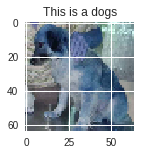

In [0]:
show_images(X_train, y_train,2)

In [0]:
print(test_pred)

[1]


In [0]:
image = X_train[5]
test_pred = model9.predict_classes(image.reshape(1, 64, 64, 3))

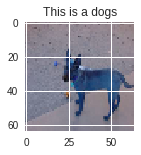

In [0]:
show_images(X_train, y_train,5)

In [0]:
print(test_pred)

[1]


In [0]:
image = X_train[99]
test_pred = model9.predict_classes(image.reshape(1, 64, 64, 3))

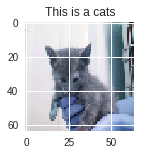

In [0]:
show_images(X_train, y_train,99)

In [0]:
print(test_pred)

[0]
